# Data Dictionary

- AGE:  integer (years of age)
- HEIGHT: integer (cm) 
- WEIGHT: integer (kg)
- GENDER: categorical (1: female, 2: male)
- AP_HIGH (Systolic blood pressure), integer
- AP_LOW (diastolic blood pressure), integer 
- CHOLESTEROL: categorical (1: normal, 2: above normal, 3: well above normal)
- GLUCOSE: categorical (1: normal, 2: above normal, 3: well above normal)
- SMOKE: categorical (0: no, 1: yes)
- ALCOHOL: categorical (0: no, 1: yes)
- PHYSICAL_ACTIVITY: categorical (0: no, 1: yes)

**Target variable**
- CARDIO_DISEASE:  categorical (0: no, 1: yes)

In [61]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build logistic regression_model
from sklearn.linear_model import LogisticRegression

# import confusion matrix and accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


from sklearn.model_selection import learning_curve

from sklearn.preprocessing import StandardScaler

import joblib


In [2]:
df = pd.read_csv("cardiovascular_diseases_dv3.csv")

In [3]:
df.shape

(68783, 12)

In [4]:
df.head(10)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
5,60,1,151,67,120,80,2,2,0,0,0,0
6,61,1,157,93,130,80,3,1,0,0,1,0
7,62,2,178,95,130,90,3,3,0,0,1,1
8,48,1,158,71,110,70,1,1,0,0,1,0
9,54,1,164,68,110,60,1,1,0,0,0,0


In [5]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


(None,
 AGE                  0
 GENDER               0
 HEIGHT               0
 WEIGHT               0
 AP_HIGH              0
 AP_LOW               0
 CHOLESTEROL          0
 GLUCOSE              0
 SMOKE                0
 ALCOHOL              0
 PHYSICAL_ACTIVITY    0
 CARDIO_DISEASE       0
 dtype: int64)

- Dataset is already clean when downloaded from kaggle. Had to set the delimiter for the csv file to change it from 1 to 12 columns. ';' is the delimiter. 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,68783.0,53.326781,6.768163,30.0,48.0,54.0,58.0,65.0
GENDER,68783.0,1.348749,0.476578,1.0,1.0,1.0,2.0,2.0
HEIGHT,68783.0,164.361252,8.184850,55.0,159.0,165.0,170.0,250.0
WEIGHT,68783.0,74.121934,14.331392,11.0,65.0,72.0,82.0,200.0
AP_HIGH,68783.0,126.614585,16.763763,60.0,120.0,120.0,140.0,240.0
AP_LOW,68783.0,81.381591,9.676679,40.0,80.0,80.0,90.0,190.0
CHOLESTEROL,68783.0,1.364727,0.678976,1.0,1.0,1.0,2.0,3.0
GLUCOSE,68783.0,1.225986,0.571961,1.0,1.0,1.0,1.0,3.0
SMOKE,68783.0,0.088001,0.283299,0.0,0.0,0.0,0.0,1.0
ALCOHOL,68783.0,0.053632,0.225293,0.0,0.0,0.0,0.0,1.0


# Data Preprocessing

### AGE

In [7]:
df["AGE"].value_counts()

56    5911
54    5897
58    5586
60    5377
52    5194
50    5187
62    3850
64    3840
48    3145
46    2910
44    2788
40    2674
42    2586
55    1477
57    1422
53    1383
59    1330
51    1325
61    1196
49    1040
63     997
41     754
45     746
47     744
43     674
39     402
65     344
30       4
Name: AGE, dtype: int64

### GENDER

In [8]:
df["GENDER"].value_counts()

1    44795
2    23988
Name: GENDER, dtype: int64

### HEIGHT

In [9]:
df["HEIGHT"].value_counts()  # Weight in KG

165    5760
160    4943
170    4606
168    4329
164    3345
158    3255
162    3204
169    2751
156    2709
167    2498
163    2487
172    1978
159    1966
166    1942
157    1783
175    1778
155    1739
161    1672
174    1538
154    1417
171    1284
178    1205
152    1132
176    1111
173    1056
153    1040
150    1028
180     858
151     599
177     447
179     411
149     337
182     322
148     292
185     225
147     221
181     188
183     156
145     151
184     150
146     146
186     103
187      76
144      69
140      48
188      46
143      45
190      40
189      36
120      33
142      29
141      21
198      14
130      12
192      12
191      11
137      11
138       9
110       7
195       6
133       6
139       6
196       6
193       6
135       5
136       5
197       4
125       4
100       3
132       3
67        3
104       2
134       2
194       2
70        2
117       2
75        2
65        2
68        2
105       2
109       2
128       1
108       1
111 

### WEIGHT

In [10]:
df["WEIGHT"].value_counts()

65     3809
70     3718
68     2798
75     2703
60     2687
80     2585
72     2272
69     2171
78     2050
74     1842
62     1832
85     1637
67     1603
63     1602
64     1572
76     1501
73     1429
71     1428
66     1368
58     1325
90     1308
82     1298
79     1270
84     1080
59     1015
83      974
61      970
56      963
77      962
86      936
81      879
89      856
87      777
55      752
88      727
95      712
92      705
57      705
54      588
100     579
52      534
93      531
50      495
94      477
98      469
91      435
53      424
96      421
97      383
105     350
51      275
102     257
110     244
99      238
103     227
48      180
104     177
49      173
101     167
108     150
106     148
115     121
45      120
112     113
47      112
120     111
107     111
109     111
46       95
113      74
44       66
114      62
111      61
43       55
117      54
118      51
130      50
42       50
116      48
40       42
125      38
41       35
123      35
119 

### AP_HIGH

In [11]:
df["AP_HIGH"].value_counts()

120    27663
140     9329
130     8915
110     8633
150     4206
160     2801
100     2581
90       981
170      652
180      606
125      438
145      227
115      220
135      208
190      115
80       104
200       97
155       73
105       64
95        39
165       38
128       34
123       23
127       23
210       21
112       20
117       20
141       20
220       20
138       18
124       17
148       16
122       16
126       16
70        16
118       15
136       15
113       15
134       15
175       14
132       14
153       14
168       13
151       13
119       13
147       13
143       12
121       12
114       11
156       10
131       10
149       10
144       10
139       10
85        10
106       10
102        9
103        9
111        9
109        9
146        9
116        9
108        9
142        8
171        8
172        8
137        8
154        8
133        8
107        7
185        7
240        7
152        7
159        7
164        7
158        7
166        7

### AP_LOW

In [12]:
df["AP_HIGH"].value_counts()

120    27663
140     9329
130     8915
110     8633
150     4206
160     2801
100     2581
90       981
170      652
180      606
125      438
145      227
115      220
135      208
190      115
80       104
200       97
155       73
105       64
95        39
165       38
128       34
123       23
127       23
210       21
112       20
117       20
141       20
220       20
138       18
124       17
148       16
122       16
126       16
70        16
118       15
136       15
113       15
134       15
175       14
132       14
153       14
168       13
151       13
119       13
147       13
143       12
121       12
114       11
156       10
131       10
149       10
144       10
139       10
85        10
106       10
102        9
103        9
111        9
109        9
146        9
116        9
108        9
142        8
171        8
172        8
137        8
154        8
133        8
107        7
185        7
240        7
152        7
159        7
164        7
158        7
166        7

### CHOLESTEROL

In [13]:
df["CHOLESTEROL"].value_counts()

1    51582
2     9315
3     7886
Name: CHOLESTEROL, dtype: int64

### GLUCOSE

In [14]:
df["GLUCOSE"].value_counts()

1    58474
3     5235
2     5074
Name: GLUCOSE, dtype: int64

### SMOKE

In [15]:
df["SMOKE"].value_counts()

0    62730
1     6053
Name: SMOKE, dtype: int64

### ALCOHOL

In [16]:
df["ALCOHOL"].value_counts()

0    65094
1     3689
Name: ALCOHOL, dtype: int64

### PHYSICAL_ACTIVITY

In [17]:
df["PHYSICAL_ACTIVITY"].value_counts()

1    55258
0    13525
Name: PHYSICAL_ACTIVITY, dtype: int64

- Data is already encoded so there is no need to change any data. 

### CADIO_DISEASE

In [18]:
df["CARDIO_DISEASE"].value_counts()

0    34742
1    34041
Name: CARDIO_DISEASE, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [20]:
df["CARDIO_DISEASE"].value_counts()

0    34742
1    34041
Name: CARDIO_DISEASE, dtype: int64

# Univariate analysis

In [21]:
def univariate_analysis(df):
    # Univariate Analysis
    # Numerical Variables
    numerical_vars = df.select_dtypes(include=["float64", "int64"])
    for col in numerical_vars.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    # Categorical Variables
    categorical_vars = df.select_dtypes(include=["object"])
    for col in categorical_vars.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df, palette="Set2")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

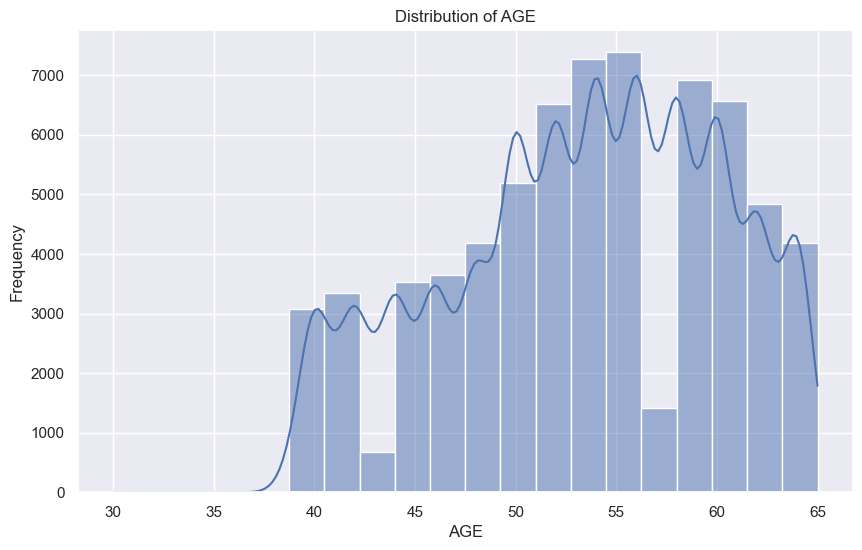

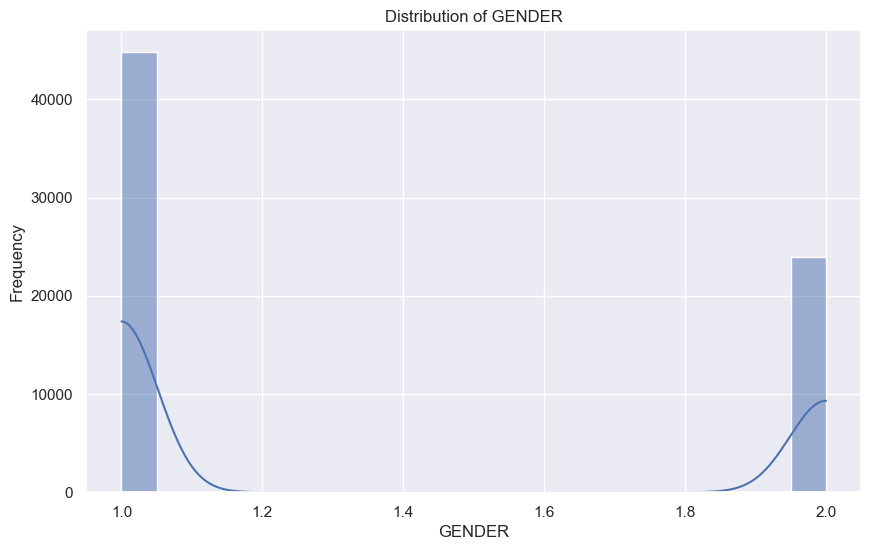

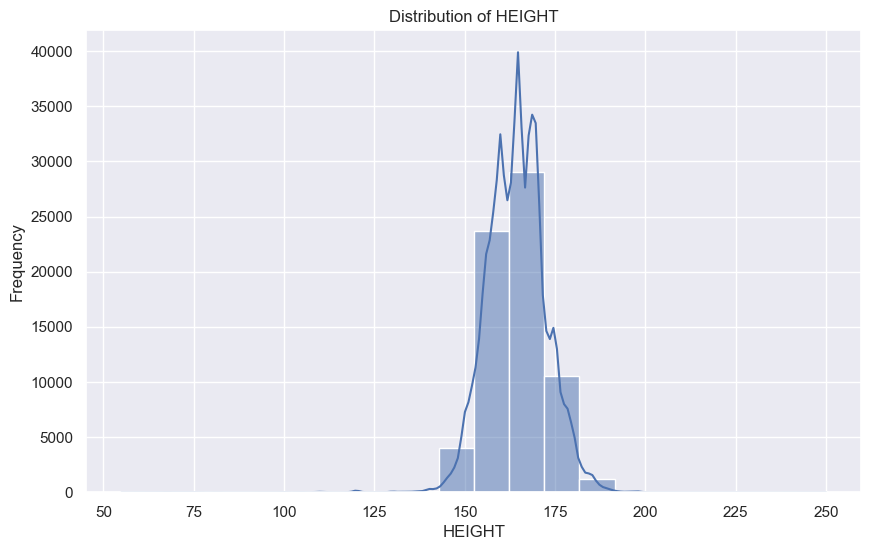

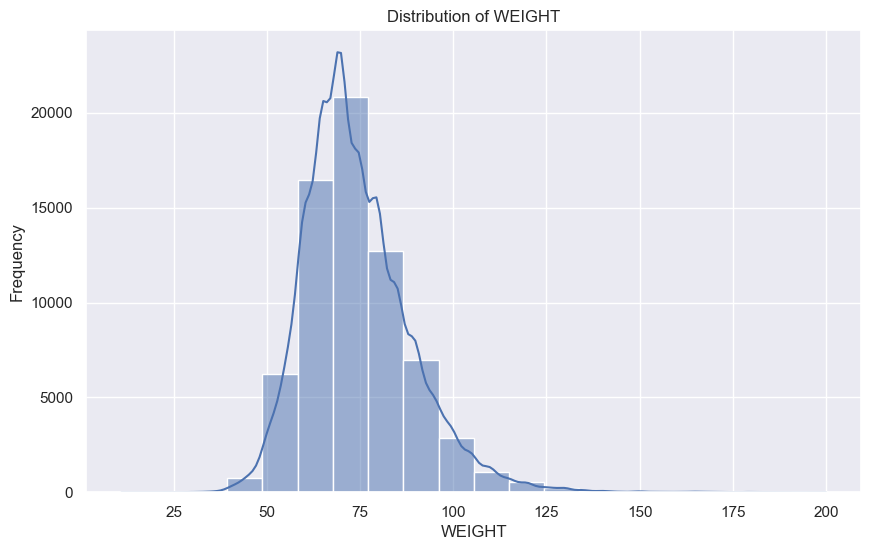

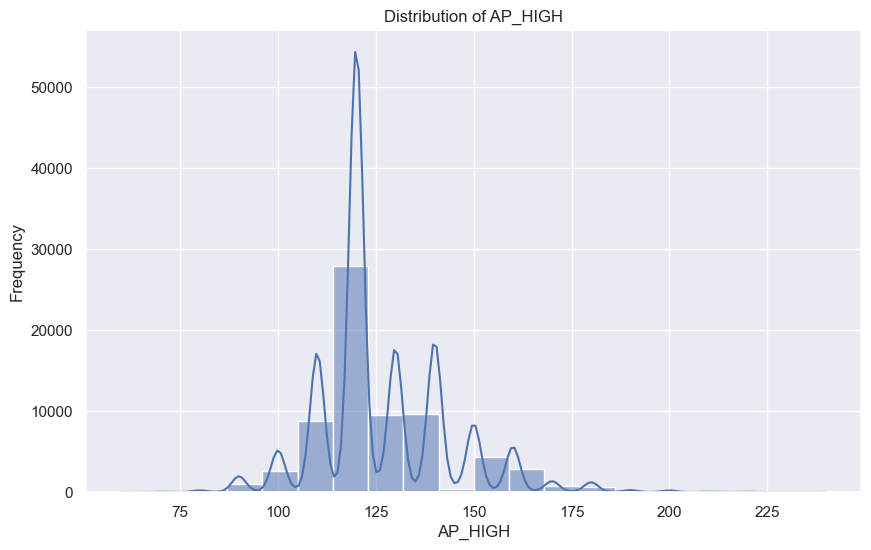

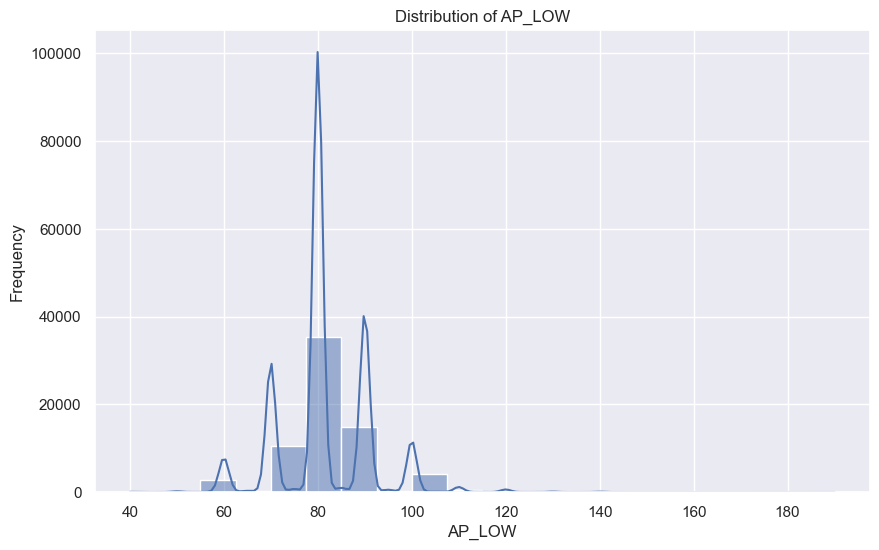

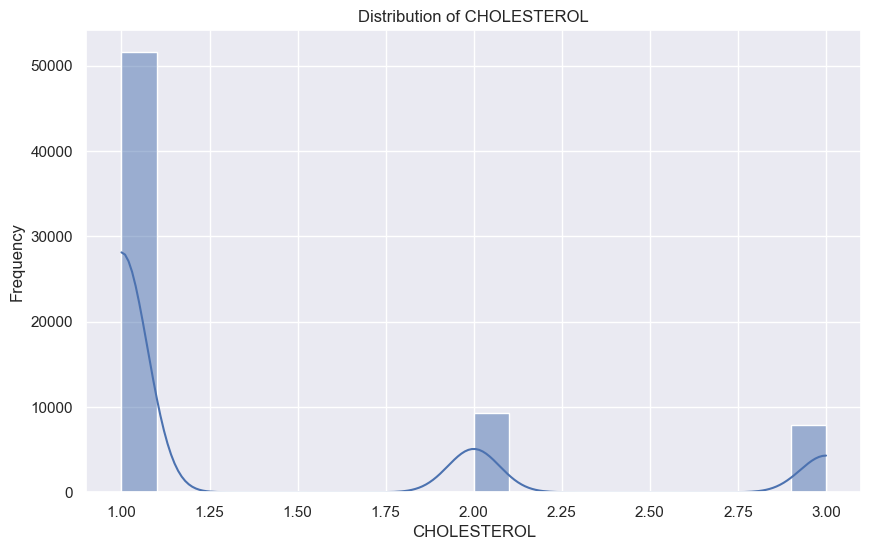

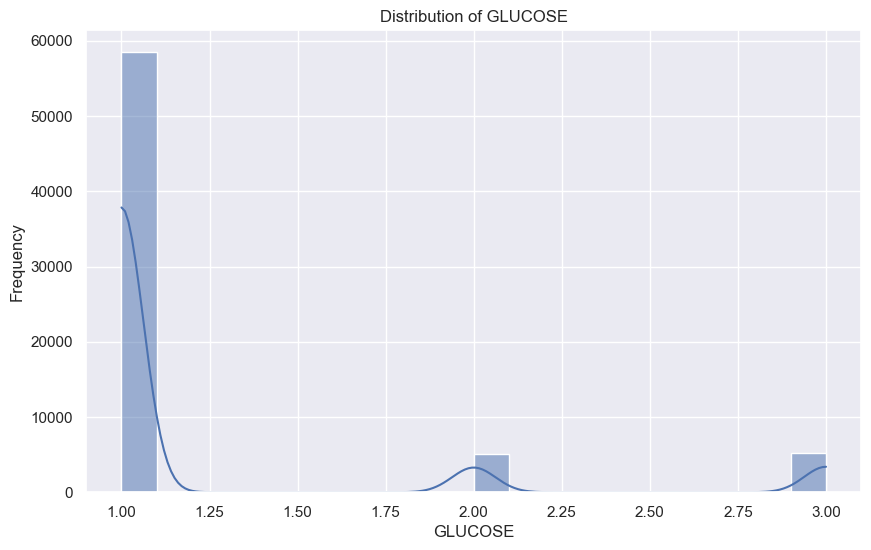

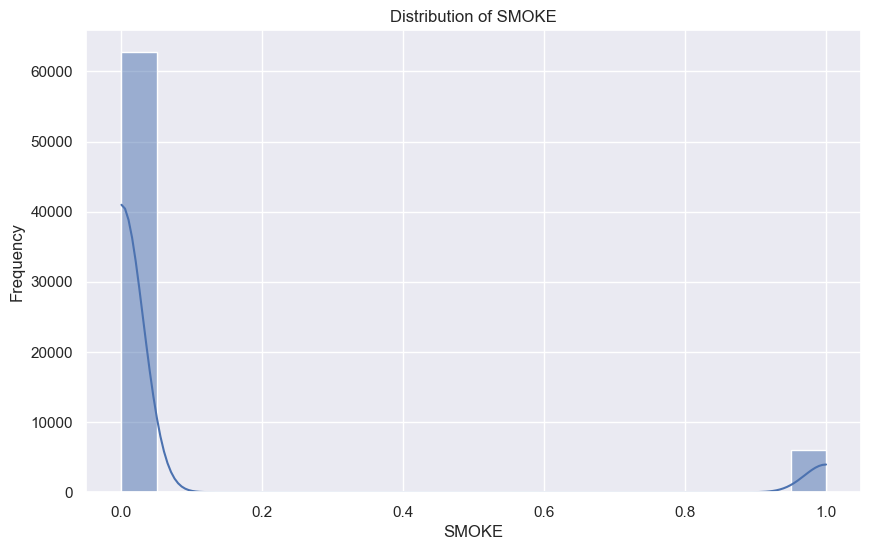

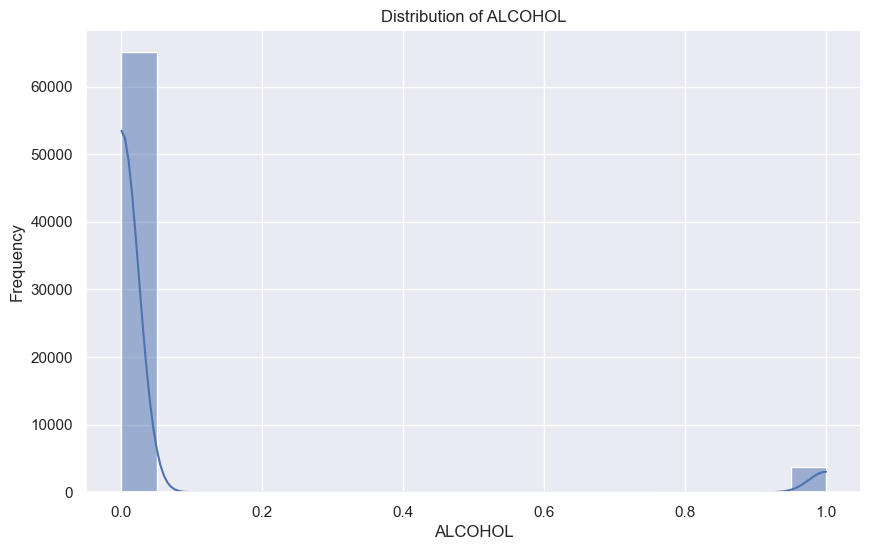

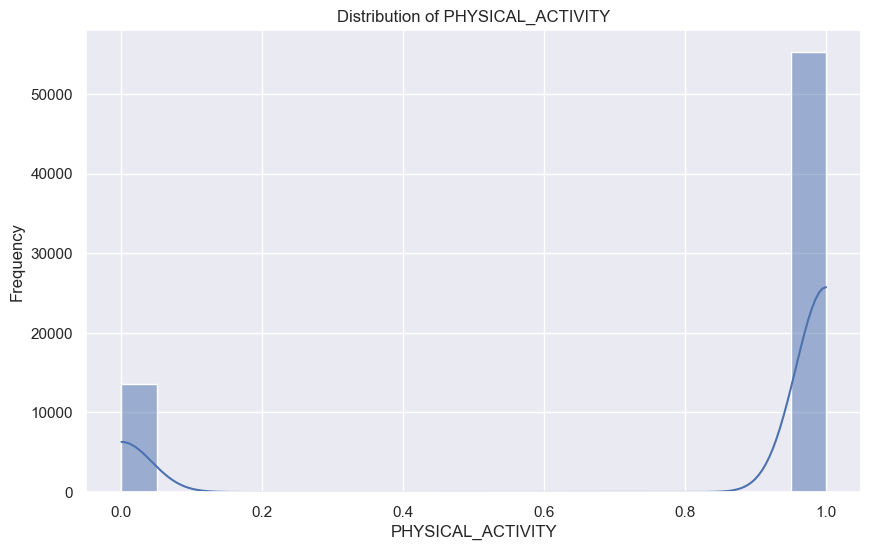

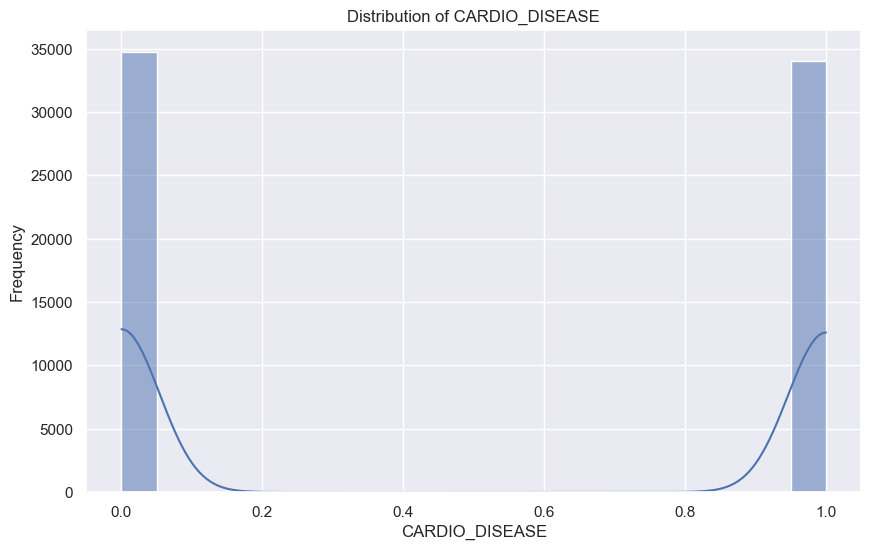

In [22]:
univariate_analysis(df)

# Bivariate analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate_analysis(df):
    # Scatter plot for each numerical variable vs CARDIO_DISEASE
    numerical_vars = ["AGE", "HEIGHT", "WEIGHT", "AP_HIGH", "AP_LOW"]

    for var in numerical_vars:
        plt.figure(figsize=(8, 6))
        sns.relplot(data=df, x=var, y="CARDIO_DISEASE", hue="CARDIO_DISEASE", kind="scatter", palette="muted")
        plt.title(f"{var} vs Cardio Disease")
        plt.xlabel(var)
        plt.ylabel("Cardio Disease (0: No, 1: Yes)")
        plt.legend(title="Cardio Disease")
        plt.show()

    # Categorical-Numerical Relationship
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="GENDER", y="WEIGHT", data=df, hue="CARDIO_DISEASE", palette="Pastel1")
    plt.title("Gender vs Weight")
    plt.xlabel("Gender (1: Female, 2: Male)")
    plt.ylabel("Weight (kg)")
    plt.show()

    # Categorical-Numerical Relationship with Cholesterol
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="CHOLESTEROL", y="AGE", data=df, hue="CARDIO_DISEASE", palette="Set2")
    plt.title("Cholesterol Level vs Age")
    plt.xlabel("Cholesterol (1: Normal, 2: Above Normal, 3: Well Above Normal)")
    plt.ylabel("Age")
    plt.legend(title="Cardio Disease")
    plt.show()

    # Count Plot for Smoking and Cardio Disease
    plt.figure(figsize=(8, 6))
    sns.countplot(x="CARDIO_DISEASE", hue="SMOKE", data=df, palette="Set2")
    plt.title("Cardio Disease vs Smoking")
    plt.xlabel("Cardio Disease")
    plt.ylabel("Count")
    plt.legend(title="Smoke (0: No, 1: Yes)")
    plt.show()

    # Count Plot for Physical Activity and Cardio Disease
    plt.figure(figsize=(8, 6))
    sns.countplot(x="CARDIO_DISEASE", hue="PHYSICAL_ACTIVITY", data=df, palette="Set2")
    plt.title("Cardio Disease vs Physical Activity")
    plt.xlabel("Cardio Disease")
    plt.ylabel("Count")
    plt.legend(title="Physical Activity (0: No, 1: Yes)")
    plt.show()

    # Correlation Heatmap with Target Variable (Cardio Disease)
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix[["CARDIO_DISEASE"]],
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
    )
    plt.title("Correlation with Target Variable (Cardio Disease)")
    plt.show()

    # Full Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
    )
    plt.title("Correlation Heatmap")
    plt.show()


<Figure size 800x600 with 0 Axes>

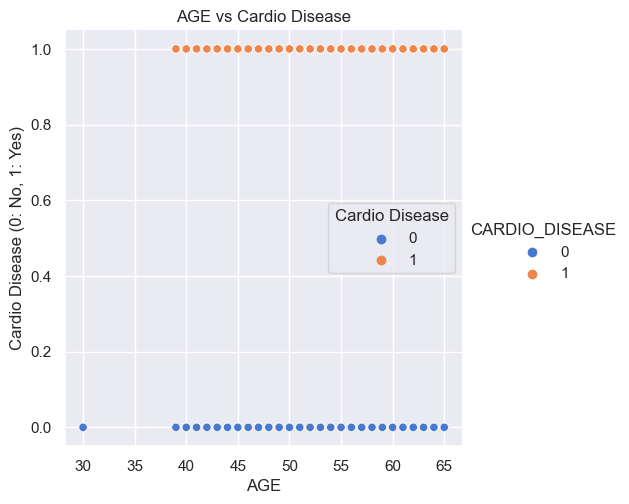

<Figure size 800x600 with 0 Axes>

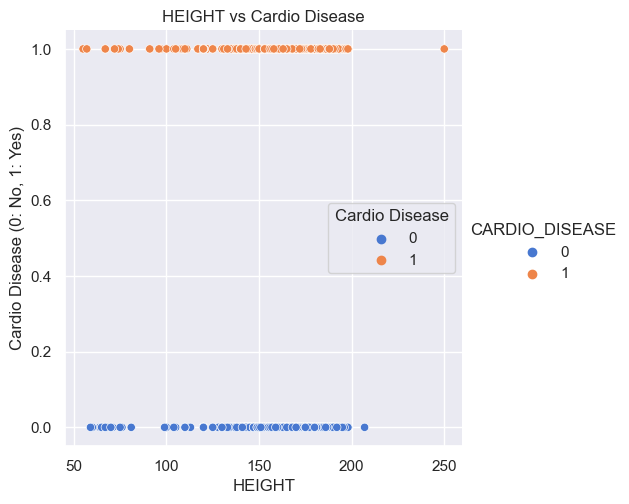

<Figure size 800x600 with 0 Axes>

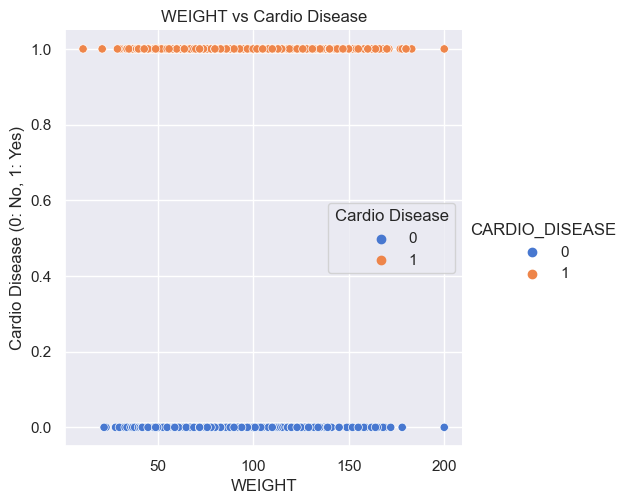

<Figure size 800x600 with 0 Axes>

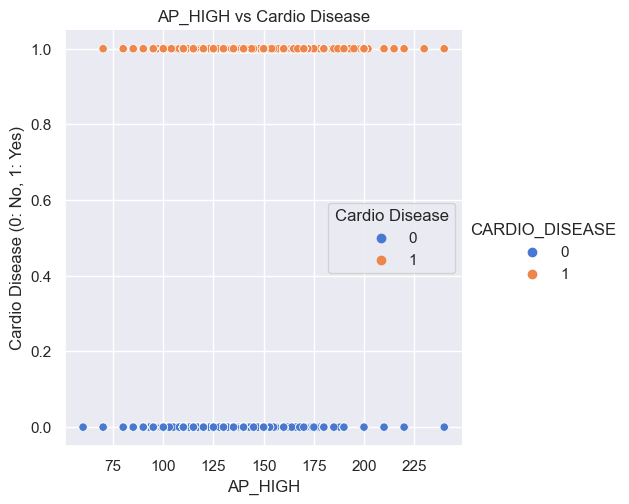

<Figure size 800x600 with 0 Axes>

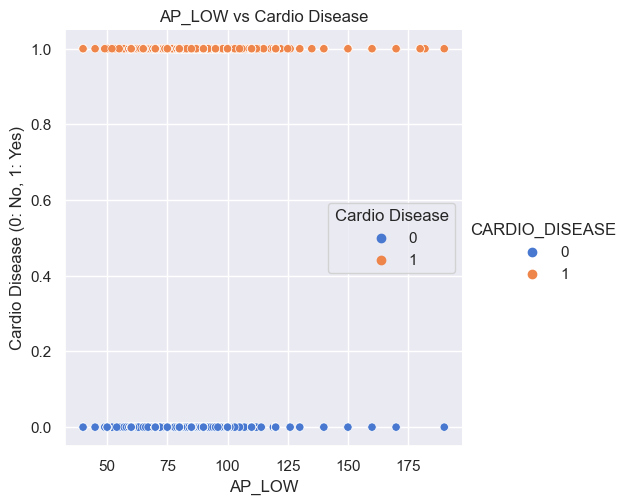

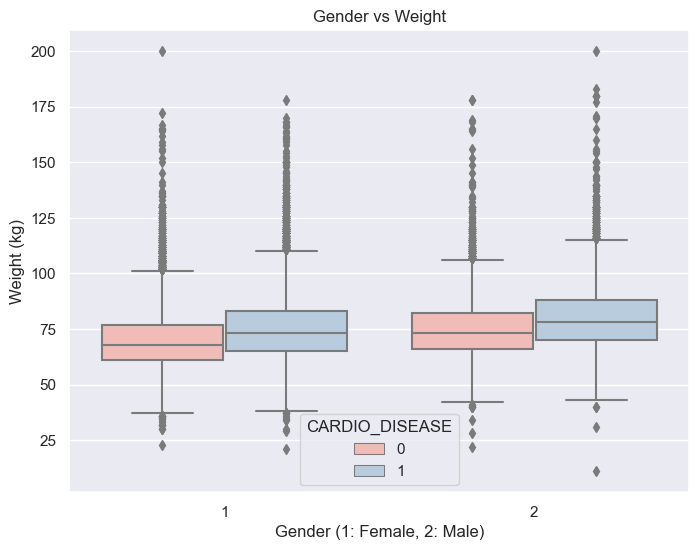

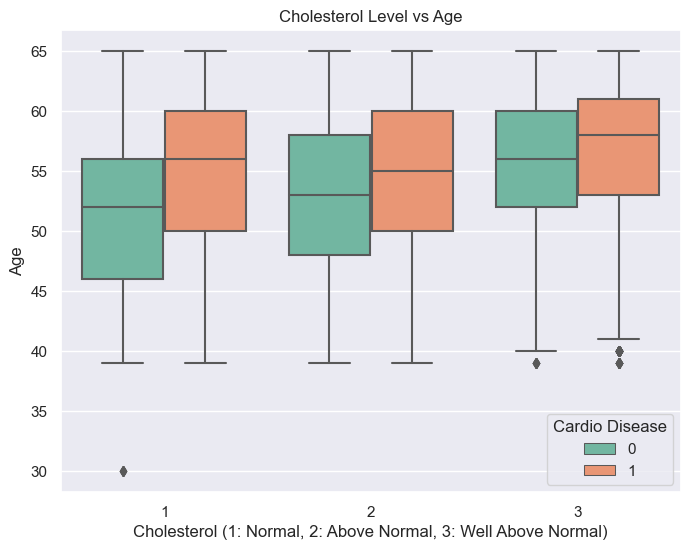

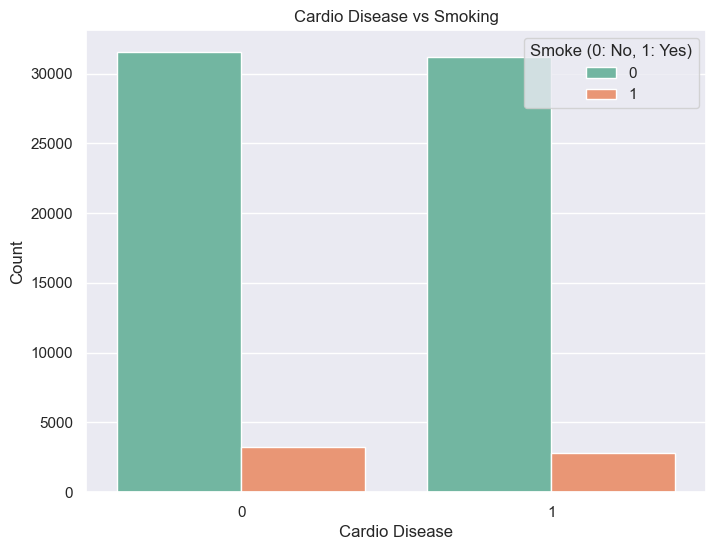

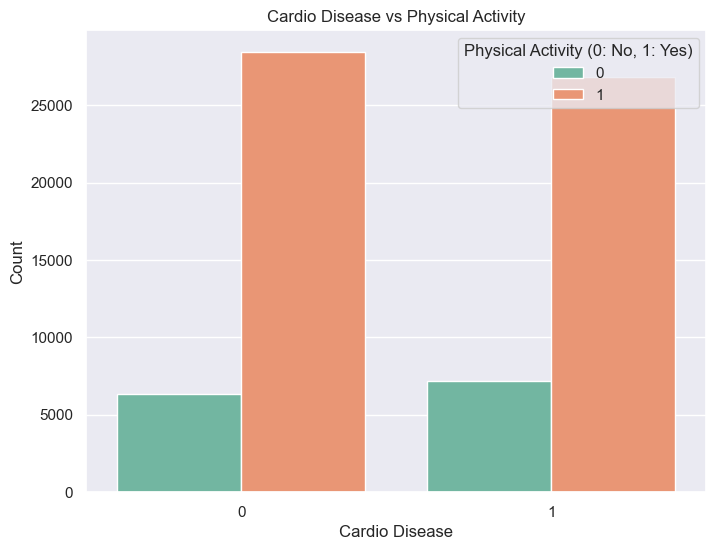

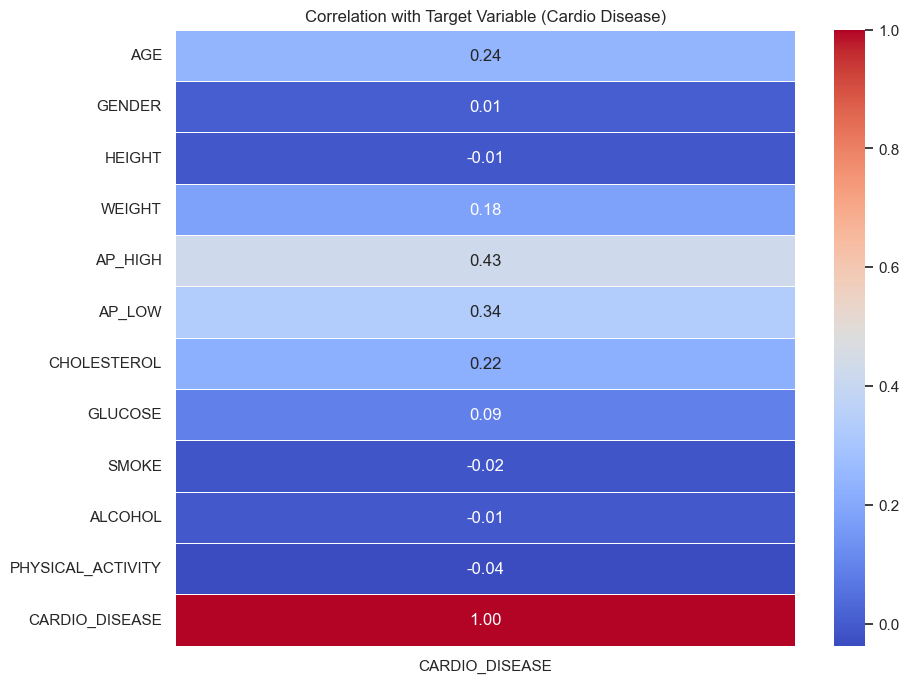

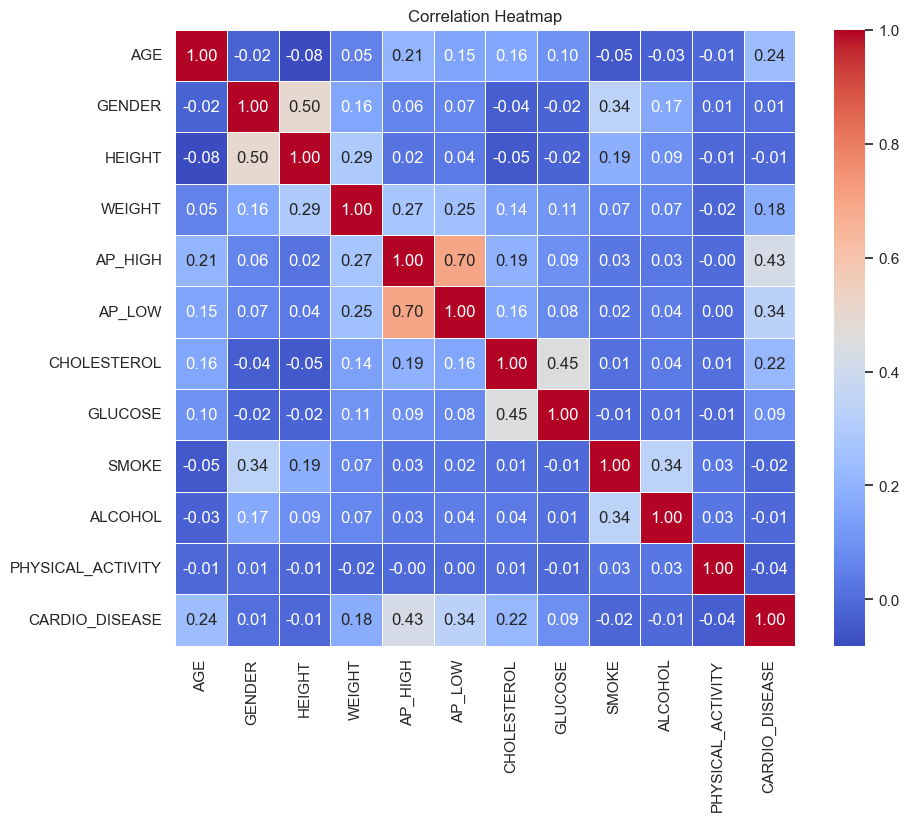

In [24]:
bivariate_analysis(df)

#Scaling the Featuers

def scale_features(df):
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

scale_features(df)

df.info()

# Model building

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def get_metrics_score_train_test(model, X_train, y_train, X_test, y_test):
    """
    Calculate and return accuracy, precision, and recall for the given model using both training and testing data.

    Parameters:
    model: The trained model
    X_train: Training features
    y_train: True labels for the training data
    X_test: Test features
    y_test: True labels for the test data

    Returns:
    metrics_dict: A dictionary containing accuracy, precision, and recall for both training and testing data
    """
    # Training data
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    
    # Testing data
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    
    metrics_dict = {
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test ,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
    }
    
    return metrics_dict

In [26]:
# Confusion Matrix
def make_confusion_matrix(model, x_test, y_actual, labels=[1, 0]):
    '''
    model : classifier to predict values of X
    x_test : test feature data
    y_actual : ground truth
    '''
    y_predict = model.predict(x_test)
    cm = confusion_matrix(y_actual, y_predict, labels=labels)
    df_cm = pd.DataFrame(cm, index=['Actual - Yes', 'Actual - No'],
                         columns=['Predicted - Yes', 'Predicted - No'])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap="Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")
    plt.show()

In [27]:
df2 = df.copy()

In [28]:
# Split the data
X = df2.drop("CARDIO_DISEASE", axis=1)  # Features
y = df2["CARDIO_DISEASE"]  # Target variable

In [29]:
X.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
0,50,2,168,62,110,80,1,1,0,0,1
1,55,1,156,85,140,90,3,1,0,0,1
2,52,1,165,64,130,70,3,1,0,0,0
3,48,2,169,82,150,100,1,1,0,0,1
4,48,1,156,56,100,60,1,1,0,0,0


In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: CARDIO_DISEASE, dtype: int64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 48148
Number of rows in test data = 20635


In [33]:
#Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
#Convert scaled data back to a DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

#Display the first few rows of the scaled data
print("Scaled Training Data:")
print(x_train_scaled_df.head())

Scaled Training Data:
        AGE    GENDER    HEIGHT    WEIGHT   AP_HIGH    AP_LOW  CHOLESTEROL  \
0 -0.197275 -0.730292 -0.532140  1.656831 -0.393486 -0.141345     0.936429   
1  0.984979  1.369315  0.814214  2.490803 -0.990929 -1.175813     2.410010   
2  0.393852 -0.730292 -1.266515  1.239845  0.203957  1.927592     0.936429   
3  0.098289 -0.730292  0.202235 -0.428099 -0.393486 -0.141345    -0.537153   
4  0.984979 -0.730292 -0.654536  1.239845  0.203957  0.893124     2.410010   

    GLUCOSE     SMOKE   ALCOHOL  PHYSICAL_ACTIVITY  
0 -0.394857 -0.307443 -0.233776           0.493807  
1 -0.394857 -0.307443 -0.233776           0.493807  
2  1.353173  3.252631 -0.233776           0.493807  
3 -0.394857 -0.307443 -0.233776           0.493807  
4 -0.394857 -0.307443 -0.233776           0.493807  


In [35]:
LogisticModel = LogisticRegression(max_iter=1000)

In [36]:
# Train the model on the full training data and evaluate on the test set
LogisticModel.fit(x_train_scaled, y_train)
y_pred = LogisticModel.predict(x_test_scaled)
print("Overall Test Accuracy:", accuracy_score(y_test, y_pred))

Overall Test Accuracy: 0.7266295129634117


In [37]:
LogisticModel_Metrics= get_metrics_score_train_test(LogisticModel, x_train_scaled, y_train, x_test_scaled, y_test)

In [38]:
LogisticModel_Metrics

{'Train Accuracy': 0.7276522389299659,
 'Test Accuracy': 0.7266295129634117,
 'Train Precision': 0.7543818095689246,
 'Test Precision': 0.7494787665971688,
 'Train Recall': 0.6676309059657066,
 'Test Recall': 0.6703965449548488}

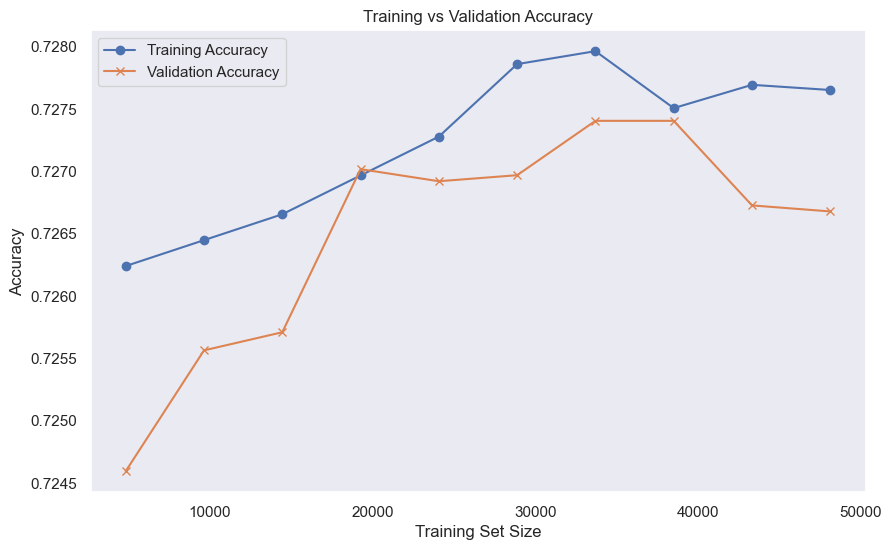

In [39]:
# Tracking Training vs. Validation Accuracy
history = {'train_acc': [], 'val_acc': []}
step_size = max(100, int(len(x_train_scaled) / 10))  # Increment step size (at least 100)

# Train the model in increments
for i in range(step_size, len(x_train_scaled) + 1, step_size):  # Start from a larger subset
    # Subset data
    x_train_subset = x_train_scaled[:i]
    y_train_subset = y_train[:i]

    # Ensure the subset contains at least two classes
    if len(set(y_train_subset)) < 2:  # If only one class, skip this iteration
        continue

    # Train the model on the subset
    LogisticModel.fit(x_train_subset, y_train_subset)
    
    # Predict on train and test data
    y_train_pred = LogisticModel.predict(x_train_scaled)
    y_test_pred = LogisticModel.predict(x_test_scaled)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_test_pred)
    
    # Record history
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

# Plotting the Training vs. Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(step_size, step_size * len(history['train_acc']) + 1, step_size), 
         history['train_acc'], label='Training Accuracy', marker='o')
plt.plot(range(step_size, step_size * len(history['val_acc']) + 1, step_size), 
         history['val_acc'], label='Validation Accuracy', marker='x')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

   ## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Assuming df2 is your dataset
# Replace 'CARDIO_DISEASE' with your target column
df2 = df.copy()

X = df2.drop("CARDIO_DISEASE", axis=1)  # Features
y = df2["CARDIO_DISEASE"]  # Target variable

In [42]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [44]:
# Random Forest Model Function
def train_random_forest(x_train_subset, y_train_subset):
    model = RandomForestClassifier(n_estimators=100, random_state=1)
    model.fit(x_train_subset, y_train_subset)
    return model

# Overall Model Training
full_model = train_random_forest(x_train_scaled, y_train)
y_pred = full_model.predict(x_test_scaled)
print("Overall Test Accuracy:", accuracy_score(y_test, y_pred))

Overall Test Accuracy: 0.7071480494305791


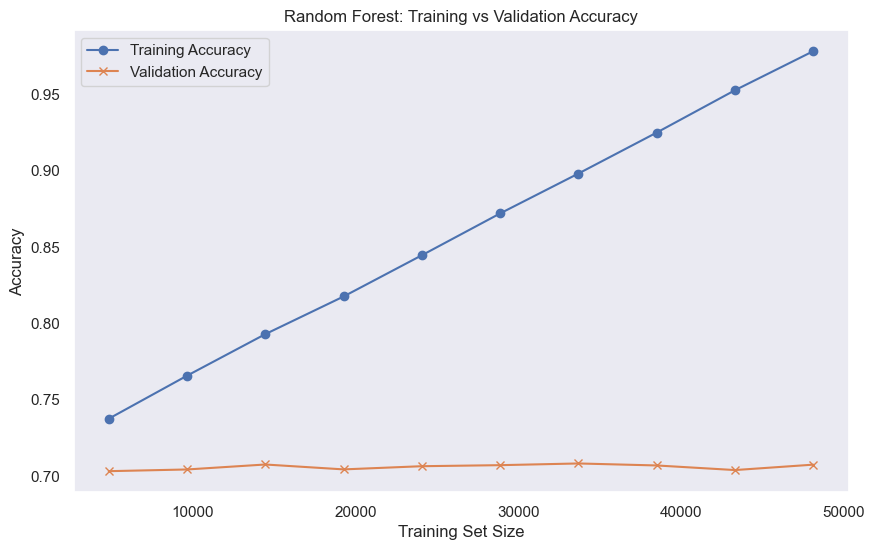

In [45]:
# Tracking Training vs Validation Accuracy
history = {'train_acc': [], 'val_acc': []}
step_size = max(100, int(len(x_train_scaled) / 10))  # Increment step size (at least 100)

# Train the model in increments
for i in range(step_size, len(x_train_scaled) + 1, step_size):  # Start from a larger subset
    # Subset data
    x_train_subset = x_train_scaled[:i]
    y_train_subset = y_train[:i]

    # Ensure the subset contains at least two classes
    if len(set(y_train_subset)) < 2:  # If only one class, skip this iteration
        continue

    # Train the model on the subset
    incremental_model = train_random_forest(x_train_subset, y_train_subset)
    
    # Predict on train and test data
    y_train_pred = incremental_model.predict(x_train_scaled)
    y_test_pred = incremental_model.predict(x_test_scaled)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_test_pred)
    
    # Record history
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

# Plotting the Training vs Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(step_size, step_size * len(history['train_acc']) + 1, step_size), 
         history['train_acc'], label='Training Accuracy', marker='o')
plt.plot(range(step_size, step_size * len(history['val_acc']) + 1, step_size), 
         history['val_acc'], label='Validation Accuracy', marker='x')
plt.title('Random Forest: Training vs Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [46]:
full_model= get_metrics_score_train_test(full_model, x_train_scaled, y_train, x_test_scaled, y_test)

In [47]:
full_model

{'Train Accuracy': 0.9778807011713883,
 'Test Accuracy': 0.7071480494305791,
 'Train Precision': 0.985388088949476,
 'Test Precision': 0.7061573659604098,
 'Train Recall': 0.9697312706997023,
 'Test Recall': 0.6968001570475069}

## Random forest regularization

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForest model with regularization parameters
rf_model = RandomForestClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=1)

# Train the model
rf_model.fit(x_train_scaled, y_train)

# Predict and evaluate performance
y_train_pred = rf_model.predict(x_train_scaled)
y_test_pred = rf_model.predict(x_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision and Recall
from sklearn.metrics import precision_score, recall_score

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")
print(f"Train Recall: {train_recall}")
print(f"Test Recall: {test_recall}")


Train Accuracy: 0.7492938439810584
Test Accuracy: 0.733220256845166
Train Precision: 0.7825419664268585
Test Precision: 0.7589295587747429
Train Recall: 0.6840229740493858
Test Recall: 0.6736356497840597


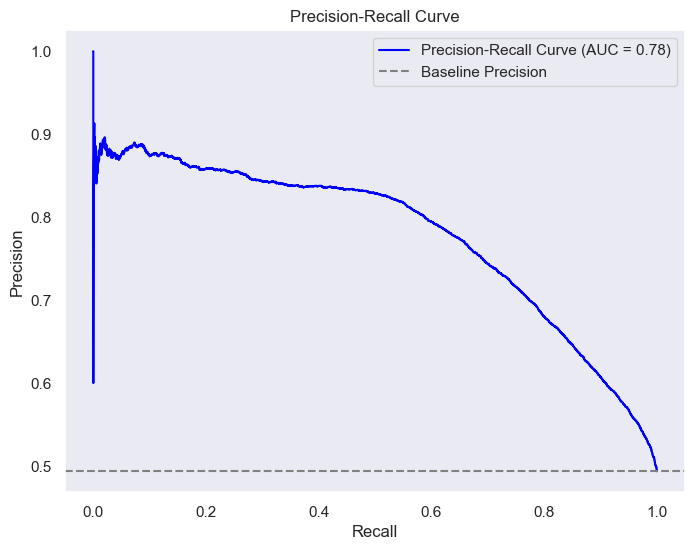

In [50]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_test_proba = rf_model.predict_proba(x_test_scaled)[:, 1]

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Calculate the area under the Precision-Recall Curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AUC = {auc_pr:.2f})", color="blue")
plt.axhline(y=sum(y_test) / len(y_test), linestyle="--", color="gray", label="Baseline Precision")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

## Random Forest Tuned

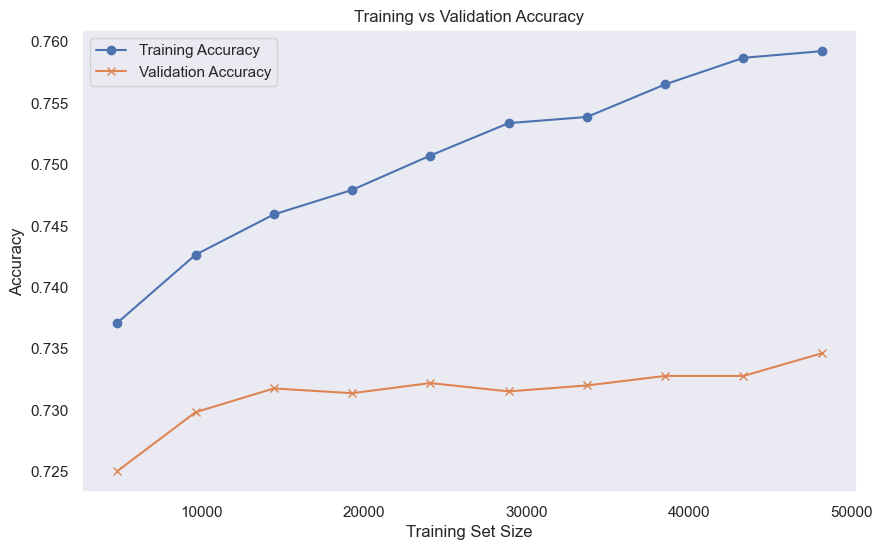

In [54]:
# Assuming df is already defined
df2 = df.copy()  # Replace 'df' with your actual DataFrame variable if it's not already `df`

# Feature and target separation
X = df2.drop("CARDIO_DISEASE", axis=1)  # Features
y = df2["CARDIO_DISEASE"]  # Target variable

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert scaled data to DataFrames for feature names
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Initialize the RandomForest model with regularization parameters
def train_random_forest(x_train_subset, y_train_subset):
    rf_model = RandomForestClassifier(
        n_estimators=300, 
        max_depth=12,  # Lower max depth
        min_samples_split=10, 
        min_samples_leaf=5,  # Increase leaf size
        max_features='sqrt', 
        class_weight='balanced', 
        random_state=1)
    rf_model.fit(x_train_subset, y_train_subset)
    return rf_model

# Tracking accuracy for each subset of training data
history = {'train_acc': [], 'val_acc': []}
step_size = max(100, int(len(x_train_scaled) / 10))  # Increment step size (at least 100)

# Train the model in increments
for i in range(step_size, len(x_train_scaled) + 1, step_size):  # Start from a larger subset
    # Subset data
    x_train_subset = x_train_scaled_df[:i]
    y_train_subset = y_train[:i]

    # Ensure the subset contains at least two classes
    if len(set(y_train_subset)) < 2:  # If only one class, skip this iteration
        continue

    # Train the model on the subset
    rf_model = train_random_forest(x_train_subset, y_train_subset)
    
    # Predict on train and test data
    y_train_pred = rf_model.predict(x_train_scaled_df)
    y_test_pred = rf_model.predict(x_test_scaled_df)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_test, y_test_pred)
    
    # Record history
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

# Plotting the Training vs. Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(step_size, step_size * len(history['train_acc']) + 1, step_size), 
         history['train_acc'], label='Training Accuracy', marker='o')
plt.plot(range(step_size, step_size * len(history['val_acc']) + 1, step_size), 
         history['val_acc'], label='Validation Accuracy', marker='x')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [57]:
# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

# Final Evaluation Metrics
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")
print(f"Train Recall: {train_recall}")
print(f"Test Recall: {test_recall}")

Train Accuracy: 0.7592215668355903
Test Accuracy: 0.7346256360552459
Train Precision: 0.7834551003421807
Test Precision: 0.7517631972643727
Train Recall: 0.7103089758101706
Test Recall: 0.6905182567726738


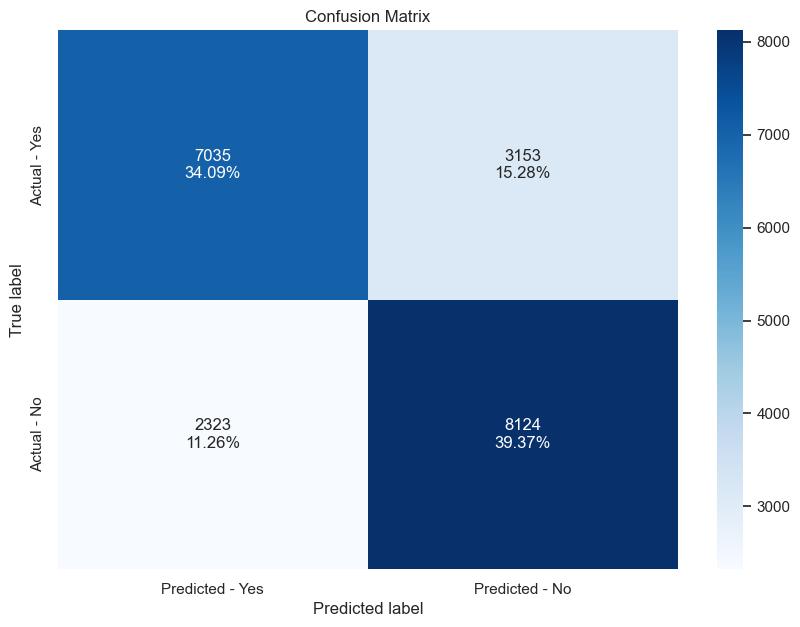

In [55]:
make_confusion_matrix(rf_model, x_test_scaled_df, y_test)

In [64]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model_final.joblib')

# Save the scaler (important for ensuring the same scaling during inference)
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [63]:
print(type(random_forest_model))

<class 'str'>


In [67]:
X.head(10)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
0,50,2,168,62,110,80,1,1,0,0,1
1,55,1,156,85,140,90,3,1,0,0,1
2,52,1,165,64,130,70,3,1,0,0,0
3,48,2,169,82,150,100,1,1,0,0,1
4,48,1,156,56,100,60,1,1,0,0,0
5,60,1,151,67,120,80,2,2,0,0,0
6,61,1,157,93,130,80,3,1,0,0,1
7,62,2,178,95,130,90,3,3,0,0,1
8,48,1,158,71,110,70,1,1,0,0,1
9,54,1,164,68,110,60,1,1,0,0,0
